In [1]:
# Import necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading global-power-plant-database.csv file
data = pd.read_csv('database_IND.csv')
# Looking for first five rows
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [3]:
# we see that nan values is  present in our dataset

In [4]:
#Looking for  max rows
pd.set_option('display.max.rows',None)

In [5]:
# Check Column name:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [6]:
# Checking  total number columns and rows
data.shape

(908, 25)

In [7]:
#we see that dataset as 908 rows and 25 columns

In [8]:
#removing duplicate values
data.drop_duplicates(inplace=True)

In [9]:
# Checking  total number columns and rows
data.shape

(908, 25)

In [10]:
# There is no duplicate value in our dataset

In [11]:
#Checking the datatype of each attribute
data.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [12]:
# Identifing the type of Problem- Output: capacity_mw is contionus data so we use regression models

In [13]:
# Checking Null values of each attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [14]:
# we see that other_fuel3,wepp_id,estimated_generation_gwh  has no value so we removed it

In [15]:
# Removing those attribute which has no value
data.drop(['other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace = True)

In [16]:
# Checking missing values of each attributes
data.isna().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
other_fuel2               907
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

In [17]:
# we see that most of attribute has missing values

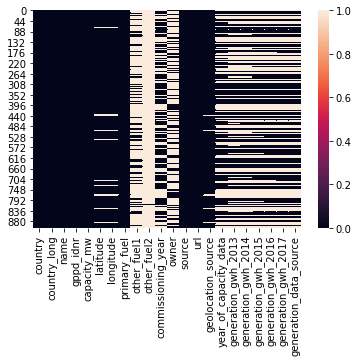

In [18]:
#Looking for null values if any, in heatmap
sns.heatmap(data.isna())
plt.show()

In [19]:
data['latitude'].unique()

array([28.1839, 24.7663, 21.9038, 23.8712, 21.9603, 23.7689, 10.4547,
       32.2258, 16.33  , 23.1642, 21.0782, 31.2717, 24.2007, 31.2412,
           nan, 24.201 , 25.1797, 23.0666, 23.0655, 18.0845, 19.5867,
       16.7708, 26.6282, 21.7438, 19.7881, 28.3615, 14.5751, 14.9455,
       18.858 , 10.7245, 14.4791, 27.3473, 27.36  , 27.3632, 27.3661,
       27.3537, 27.3504, 27.3566, 13.0977, 28.506 , 16.2804, 33.1815,
       32.8063, 23.8285, 18.1396, 19.8601, 24.6929, 22.3421, 22.9956,
       32.1686, 24.1917, 24.223 , 23.6026, 21.9114, 23.807 , 25.3999,
       22.9417, 25.4865, 28.4723, 27.8453, 13.1021, 31.4306, 31.9546,
       17.3816, 20.805 , 16.6505, 16.2774, 15.1831, 15.1777, 15.1932,
       13.7008, 13.8274, 31.4107, 21.232 , 21.0813, 19.5555, 18.1012,
       19.5132, 21.5837, 11.331 , 11.2428, 11.3842, 18.2416, 21.184 ,
       18.455 , 18.4426, 18.9368, 21.0483, 25.2267, 24.2508, 23.3172,
       24.8263, 22.0103, 32.1121, 23.3256, 23.6783, 23.785 , 26.5145,
       21.2083,  9.9

In [20]:
# we see that latitude has null value so we  filled by average of latitude

In [21]:
data['latitude'].fillna(data['latitude'].mean(),inplace=True)

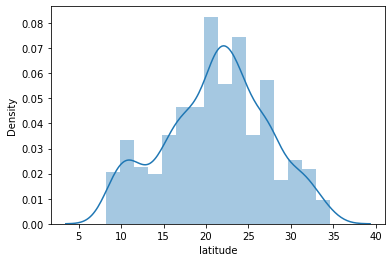

In [22]:
sns.distplot(data['latitude'])
plt.show()

In [23]:
data['longitude'].unique()

array([73.2407, 74.609 , 69.3732, 91.3602, 82.4091, 68.6447, 77.0078,
       77.207 , 75.8863, 81.6373, 77.9009, 76.4938, 82.8   , 77.8769,
           nan, 82.7891, 76.3188, 81.7841, 81.7865, 76.1851, 74.7061,
       74.9191, 79.5286, 83.2741, 79.1518, 74.2402, 76.3926, 77.687 ,
       73.6396, 77.1893, 76.3482, 71.6917, 71.6918, 71.6916, 80.2695,
       77.3066, 75.225 , 75.3155, 76.1418, 87.4513, 82.1221, 79.3421,
       74.689 , 82.4305, 88.4042, 76.4695, 81.2875, 81.2747, 74.2562,
       83.1889, 91.565 , 86.0218, 79.925 , 85.7452, 79.8066, 73.2   ,
       80.2682, 78.241 , 76.7986, 74.5345, 79.0547, 74.8209, 74.7111,
       76.7909, 77.1036, 76.7195, 75.6373, 75.7131, 76.4328, 79.6311,
       79.7708, 73.8087, 73.7252, 73.4173, 72.2222, 77.758 , 77.8659,
       77.7145, 74.7529, 81.4237, 73.3907, 73.3498, 73.4527, 75.8425,
       74.6216, 78.1606, 78.1336, 73.0901, 83.2058, 76.6537, 81.0333,
       86.0888, 85.88  , 90.5287, 74.1543, 76.3744, 88.14  , 76.532 ,
       78.9535, 78.9

In [24]:
# we see that longitude has null value so we  filled by average of longitude

In [25]:
data['longitude'].fillna(data['longitude'].mean(),inplace=True)

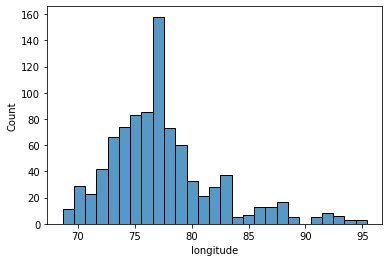

In [26]:
sns.histplot(data['longitude'])
plt.show()

In [27]:
data['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [28]:
data['other_fuel1'].fillna(data['other_fuel1'].mode()[0],inplace=True)

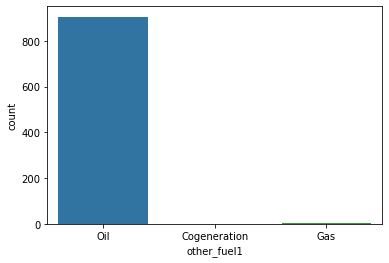

In [29]:
sns.countplot(data['other_fuel1'])
plt.show()

In [30]:
# we see that oil is larges consumption compare than other fuel

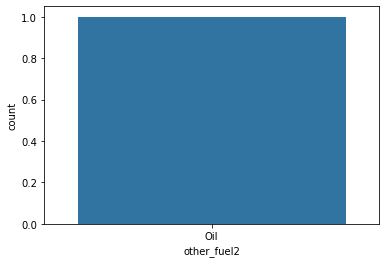

In [31]:
sns.countplot(data['other_fuel2'])
plt.show()

In [32]:
data['other_fuel2'].unique()

array([nan, 'Oil'], dtype=object)

In [33]:
# we see that 'other_fuel2' has only one variable and which has already in 'other_fuel1" and it has 906 null value so we will drop it

In [34]:
data.drop(['other_fuel2'], axis = 1, inplace = True)

In [35]:
data['commissioning_year'].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1998., 1977., 1980.,
       2003., 1984., 1973., 1996., 1991., 2002., 2001., 2006., 2007.,
       1988., 2012., 1968., 1964., 2016., 2013., 1962., 1993., 1997.,
       1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995., 1983.,
       1981., 1959., 1961., 1957., 1978., 1976., 1963., 1971., 1955.,
       2018., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [36]:
data['commissioning_year'].fillna(data['commissioning_year'].mode()[0],inplace=True)

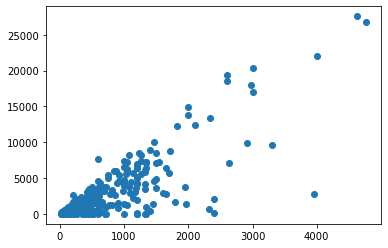

In [37]:
plt.scatter(data['capacity_mw'],data['generation_gwh_2013'])
plt.show()

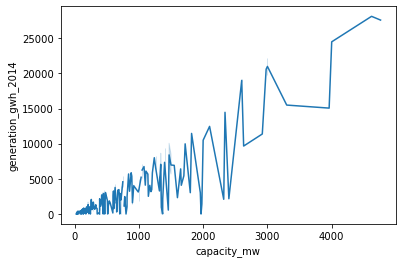

In [38]:
sns.lineplot(data['capacity_mw'],data['generation_gwh_2014'])
plt.show()

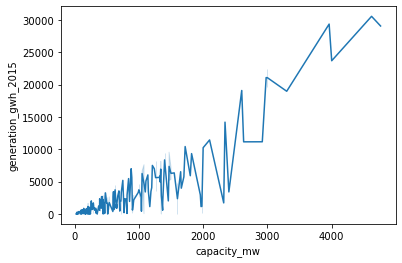

In [39]:
sns.lineplot(data['capacity_mw'],data['generation_gwh_2015'])
plt.show()

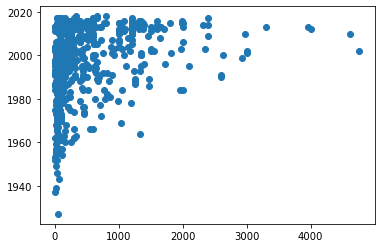

In [40]:
plt.scatter(data['capacity_mw'],data['commissioning_year'])
plt.show()

In [41]:
#we see that 1980 to 2020 generation of energy is more capacity_mw 

In [42]:
data['owner'].unique()

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', nan,
       'Hindustan Pvt lt', 'Dr Ssk ltd', 'Ashok Ssk ltd',
       'Shree Sugars ltd', 'Ener-t International Ltd.',
       'Nav Bharat Buildcon Private Limited', 'MEIL Green Power Limited',
       'Madras Cement Limited',
       'DDE Renewable Energy Private Limited (DREPL)',
       'Electromech Maritech Private Limited',
       'Finehope Allied Engineering Private Limited',
       'Khaya Solar Projects Private Limited',
       'Newton Solar Private Limited', 'Saidham Overseas Private Limited',
       'Vasavi Solar Power Private Limited', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Bharat Petroleum Corporation Limited', 'Bhilwara Energy Limited',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Bina

In [43]:
data['owner'].fillna(data['owner'].mode()[0],inplace=True)

In [44]:
data['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [45]:
data['geolocation_source'].fillna(data['geolocation_source'].mode()[0],inplace=True)

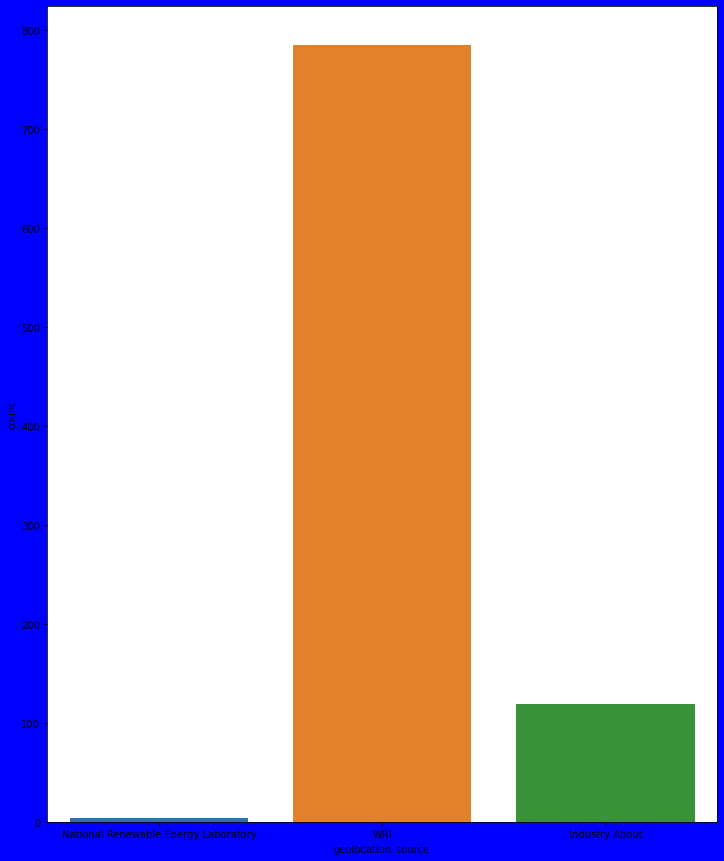

In [46]:
plt.figure(figsize=(12,15), facecolor='blue')
sns.countplot(data['geolocation_source'])
plt.show()

In [47]:
#

In [48]:
data['year_of_capacity_data'].unique()

array([  nan, 2018.])

In [49]:
data['year_of_capacity_data'].fillna(data['year_of_capacity_data'].mode()[0],inplace=True)

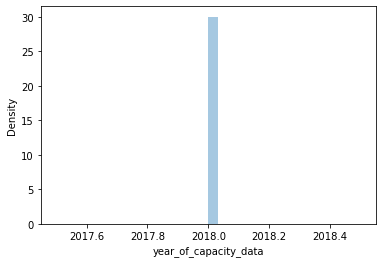

In [50]:
sns.distplot(data['year_of_capacity_data'])
plt.show()

In [51]:
data['generation_gwh_2013'].unique()

array([           nan, 6.31777928e+02, 1.66829000e+03, 8.21798000e+02,
       1.47568450e+02, 6.96738800e+02, 5.04813250e+02, 2.64232200e+03,
       1.03405000e+03, 7.31334950e+02, 6.39700000e+03, 7.13299500e+03,
       1.91994200e+03, 1.73000000e+03, 0.00000000e+00, 8.04286000e+02,
       3.76900000e+03, 2.78580100e+03, 6.34849800e+02, 6.27422600e+03,
       1.64754090e+03, 1.18871000e+03, 1.65046620e+03, 1.47080900e+02,
       1.23778000e+02, 2.27570000e+00, 2.57835110e+02, 5.44672950e+02,
       4.87135000e+00, 4.48100000e+02, 1.25663600e+03, 8.21705000e-01,
       1.33876255e+03, 2.27506750e+02, 5.65200000e+03, 6.34710500e+01,
       6.17923855e+03, 9.03460000e+01, 8.56894000e+01, 2.49148000e+01,
       4.10935000e+01, 3.31861000e+03, 9.64612700e+02, 9.48732500e+01,
       3.03007350e+02, 4.36099800e+03, 1.42839040e+03, 1.52042000e+03,
       2.79729000e+01, 3.36680000e+02, 5.49337000e+03, 2.20064150e+02,
       4.16100000e+02, 3.30880000e+00, 1.38911950e+03, 2.32916565e+03,
      

In [52]:
data['generation_gwh_2013'].fillna(data['generation_gwh_2013'].mean(),inplace=True)

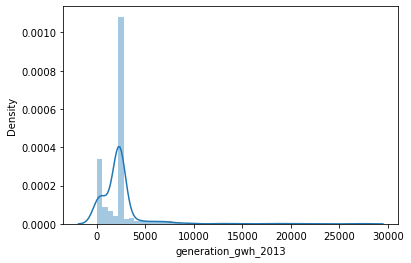

In [53]:
sns.distplot(data['generation_gwh_2013'])
plt.show()

In [54]:
data['generation_gwh_2014'].unique()

array([           nan, 6.17789264e+02, 3.03555000e+03, 1.15342100e+03,
       1.57558250e+02, 6.74391100e+02, 4.80594950e+02, 1.88790400e+03,
       1.92097100e+03, 6.14412500e+02, 7.74400000e+03, 9.67087900e+03,
       1.61198700e+03, 1.60700000e+03, 0.00000000e+00, 5.73274000e+02,
       2.93600000e+03, 2.92521045e+03, 7.92686650e+02, 7.23528100e+03,
       1.33253385e+03, 9.46141000e+02, 1.07595320e+03, 8.56595500e+01,
       1.20444750e+02, 2.65780000e+02, 3.04832800e+02, 4.95967700e+02,
       1.22100000e+03, 5.05760000e+02, 1.25573200e+03, 2.85387000e+00,
       1.24631710e+03, 2.93534950e+02, 5.44576300e+03, 5.03370500e+01,
       5.24180925e+03, 6.50730000e+01, 1.36872200e+02, 6.75605000e+01,
       2.96272000e+03, 8.32884650e+02, 9.07937500e+01, 2.99176600e+02,
       5.85507000e+03, 2.23699080e+03, 1.43887000e+03, 8.11580000e+00,
       1.45560000e+02, 5.37195000e+03, 2.34650850e+02, 3.30595670e+03,
       3.73919000e+02, 1.49121645e+03, 2.53904100e+03, 1.01567610e+03,
      

In [55]:
data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].mean(),inplace=True)

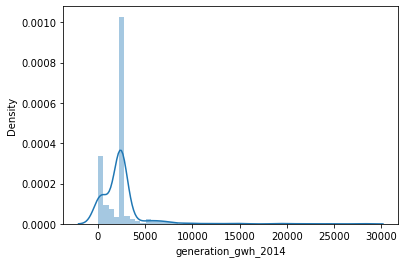

In [56]:
sns.distplot(data['generation_gwh_2014'])
plt.show()

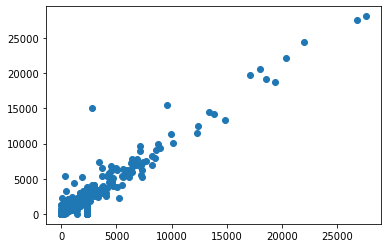

In [57]:
plt.scatter(data['generation_gwh_2013'],data['generation_gwh_2014'])
plt.show()

In [58]:
# we see that generation_gwh_2013 and generation_gwh_2014 has linear relationship

In [59]:
data['generation_gwh_2015'].unique()

array([           nan, 8.43747000e+02, 5.91637000e+03, 1.20885200e+03,
       1.52195200e+02, 7.21335200e+02, 1.44434200e+02, 1.64304600e+03,
       5.62966300e+03, 6.65197300e+02, 8.07681050e+03, 1.11510695e+04,
       9.09000000e+02, 2.70282320e+03, 1.46500000e+03, 9.86247350e+02,
       0.00000000e+00, 2.01300000e+03, 2.98513930e+03, 5.53220000e+01,
       7.41862050e+02, 5.97912500e+03, 1.43795470e+03, 6.18909900e+02,
       1.96760200e+02, 9.48831000e+02, 5.71607600e+02, 1.06942600e+02,
       3.96806000e+01, 2.31610720e+03, 2.31626436e+02, 3.26459500e+02,
       4.05600000e+03, 3.06379000e+02, 1.16531800e+03, 8.29591247e+00,
       1.29797750e+03, 3.14320500e+02, 5.74131900e+03, 3.98796000e+01,
       5.86315690e+03, 8.21372500e+01, 6.99485000e+00, 5.65160000e+00,
       1.55727450e+02, 3.26358400e+03, 6.37138300e+02, 7.35006500e+01,
       1.95935400e+02, 7.50597200e+03, 1.20406750e+03, 2.80500000e-01,
       1.63427400e+03, 1.06579200e+02, 1.28899000e+01, 3.41720000e+00,
      

In [60]:
data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mean(),inplace=True)

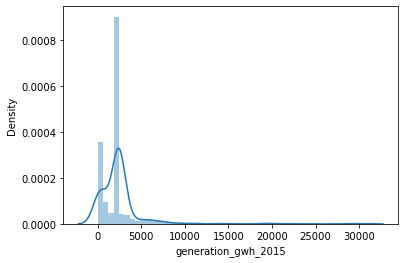

In [61]:
sns.distplot(data['generation_gwh_2015'])
plt.show()

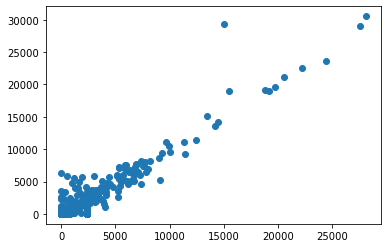

In [62]:
plt.scatter(data['generation_gwh_2014'],data['generation_gwh_2015'])
plt.show()

In [63]:
# we see this one is also linear relationship with each other

In [64]:
data['generation_gwh_2016'].unique()

array([           nan, 8.86004428e+02, 6.24300000e+03, 1.17576500e+03,
       6.14213500e+01, 6.75724400e+02, 4.02029750e+02, 1.33809300e+03,
       1.70100800e+03, 6.70500650e+02, 7.90202160e+03, 1.32273523e+04,
       6.66420000e+02, 3.51574960e+03, 5.09000000e+02, 2.83200000e+02,
       0.00000000e+00, 1.51100000e+03, 2.17363720e+03, 1.75018510e+03,
       6.65983350e+02, 6.34120200e+03, 2.80000000e+03, 9.96373100e+02,
       1.29033000e+03, 1.66863100e+03, 1.23282490e+03, 1.09181350e+02,
       5.32126000e+01, 6.77378800e+03, 1.87193669e+02, 1.20903640e+02,
       4.43242650e+02, 7.17700000e+03, 3.54900000e+02, 1.27499900e+03,
       1.04689800e+01, 1.33603625e+03, 2.96271200e+02, 5.99932000e+03,
       2.69247000e+01, 5.14242865e+03, 4.68844000e+01, 4.99230000e+01,
       1.97308500e+01, 1.73826500e+01, 2.04870500e+01, 3.37910050e+03,
       9.46871850e+02, 1.01072100e+02, 2.05557050e+02, 5.66607190e+03,
       7.39155400e+02, 1.91560000e+02, 1.27252000e+03, 5.11710000e+00,
      

In [65]:
data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mean(),inplace=True)

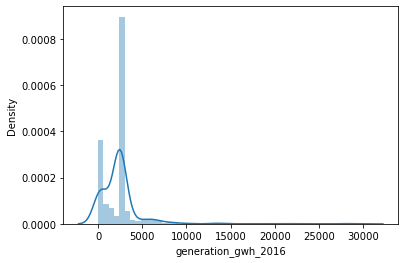

In [66]:
sns.distplot(data['generation_gwh_2016'])
plt.show()

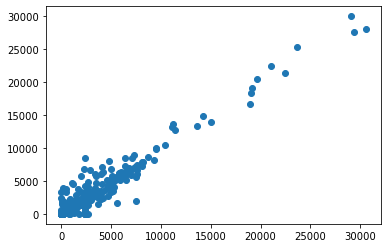

In [67]:
plt.scatter(data['generation_gwh_2015'],data['generation_gwh_2016'])
plt.show()

In [68]:
data['generation_gwh_2017'].unique()

array([           nan, 6.63774500e+02, 5.38557974e+03, 1.14791300e+03,
       8.96296000e+01, 6.79594950e+02, 4.39372100e+02, 1.56345700e+03,
       4.35055800e+03, 6.44570950e+02, 7.94074000e+03, 1.53348763e+04,
       4.30000000e+02, 5.77712000e+03, 3.57000000e+02, 5.40290000e+02,
       0.00000000e+00, 1.39500000e+03, 2.49417645e+03, 1.81284025e+03,
       6.38521350e+02, 6.77925600e+03, 2.12068000e+03, 1.46980405e+03,
       2.01879000e+03, 1.71320100e+03, 5.42643150e+02, 5.58394000e+01,
       6.84560000e+01, 6.15376000e+03, 1.78106690e+02, 3.47098000e+01,
       1.58254750e+02, 8.77800000e+03, 1.71355000e+02, 1.43607200e+03,
       5.85771000e+00, 1.32996675e+03, 3.13594150e+02, 3.73840000e+03,
       1.56115500e+01, 5.10834990e+03, 4.23372500e+01, 4.32135000e+02,
       3.74319000e+01, 1.68752000e+01, 3.59090000e+03, 8.87838500e+02,
       9.66642500e+01, 3.05664000e+02, 6.15962100e+03, 2.26547000e+03,
       5.46795000e+02, 2.75796180e+03, 4.93548800e+02, 1.54500000e+03,
      

In [69]:
data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mean(),inplace=True)

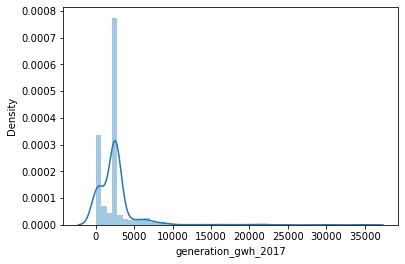

In [70]:
sns.distplot(data['generation_gwh_2017'])
plt.show()

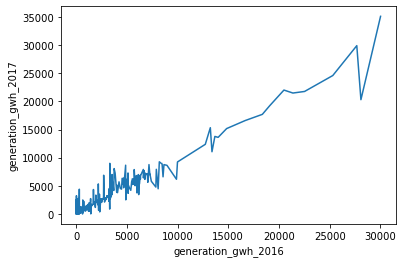

In [71]:
sns.lineplot(data['generation_gwh_2016'],data['generation_gwh_2017'])
plt.show()

In [72]:
data['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [73]:
data['generation_data_source'].fillna(data['generation_data_source'].mode()[0],inplace=True)

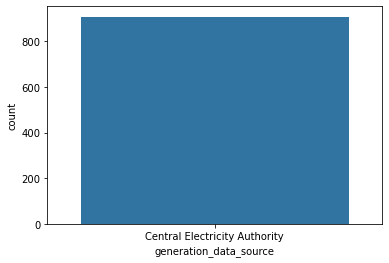

In [74]:
sns.countplot(data['generation_data_source'])
plt.show()

In [75]:
# we observed  that 'url', 'gppd_idnr','country_long' not not contribution for capacity

In [76]:
data.drop(['url', 'gppd_idnr','country_long'], axis = 1, inplace = True)

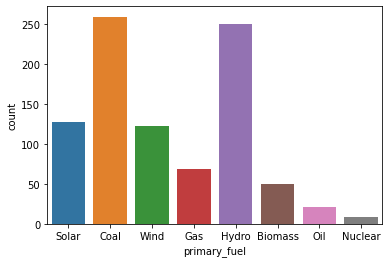

In [77]:
sns.countplot(data['primary_fuel'])
plt.show()

In [78]:
# we see that coal and hydro fuel has 

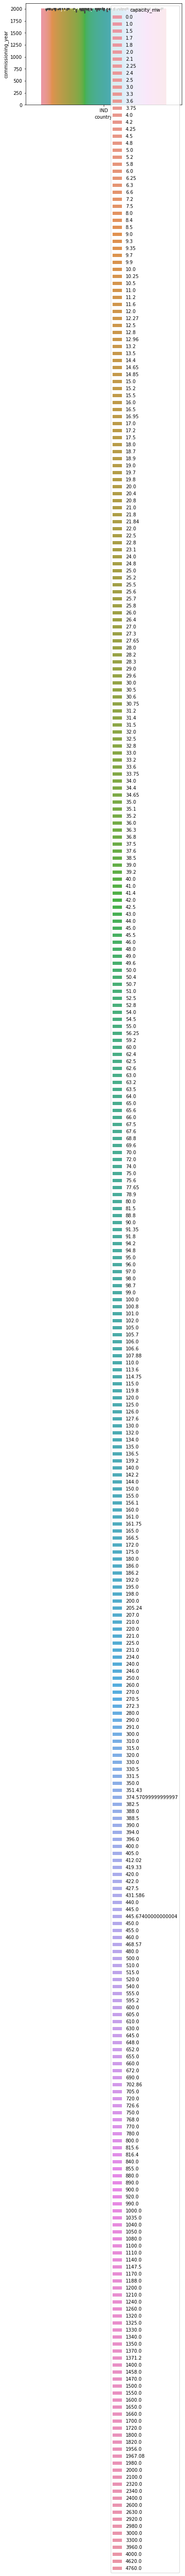

In [79]:
sns.barplot(x='country',y= 'commissioning_year',hue = 'capacity_mw', data=data)
plt.show()

In [80]:
# we see year by year generation of power is increase

In [81]:
data.head()

,country,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
1,IND,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Oil,2013.0,Ultratech Cement ltd,Ultratech Cement ltd,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
2,IND,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,Oil,2013.0,AES,CDM,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
3,IND,AGARTALA GT,135.0,23.8712,91.3602,Gas,Oil,2004.0,Acc Acc ltd,Central Electricity Authority,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,IND,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Acc Acc ltd,Central Electricity Authority,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority


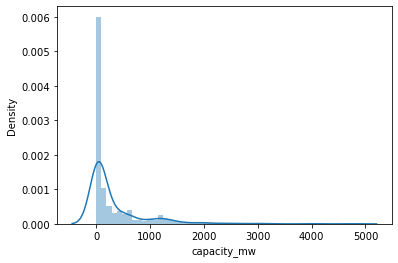

In [82]:
# Let Look how label is data ditributed
sns.distplot(data['capacity_mw'])
plt.show()

In [83]:
#Checking Correlation
data.corr()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
capacity_mw,1.000000,0.049790,0.197124,0.012518,NaN,0.667842,0.705434,0.722081,0.752829,0.767040
latitude,0.049790,1.000000,0.031501,0.034896,NaN,0.036639,0.044085,0.036127,0.030932,0.030655
longitude,0.197124,0.031501,1.000000,-0.145117,NaN,0.014021,0.011669,0.019176,0.039758,0.040407
commissioning_year,0.012518,0.034896,-0.145117,1.000000,NaN,0.094530,0.114534,0.127325,0.147275,0.147874
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2013,0.667842,0.036639,0.014021,0.094530,NaN,1.000000,0.963454,0.896376,0.873542,0.830639
generation_gwh_2014,0.705434,0.044085,0.011669,0.114534,NaN,0.963454,1.000000,0.953712,0.926010,0.891872
generation_gwh_2015,0.722081,0.036127,0.019176,0.127325,NaN,0.896376,0.953712,1.000000,0.968969,0.928459
generation_gwh_2016,0.752829,0.030932,0.039758,0.147275,NaN,0.873542,0.926010,0.968969,1.000000,0.964786
generation_gwh_2017,0.767040,0.030655,0.040407,0.147874,NaN,0.830639,0.891872,0.928459,0.964786,1.000000


In [84]:
# we can understanding properly as we use heatmap to find correleation

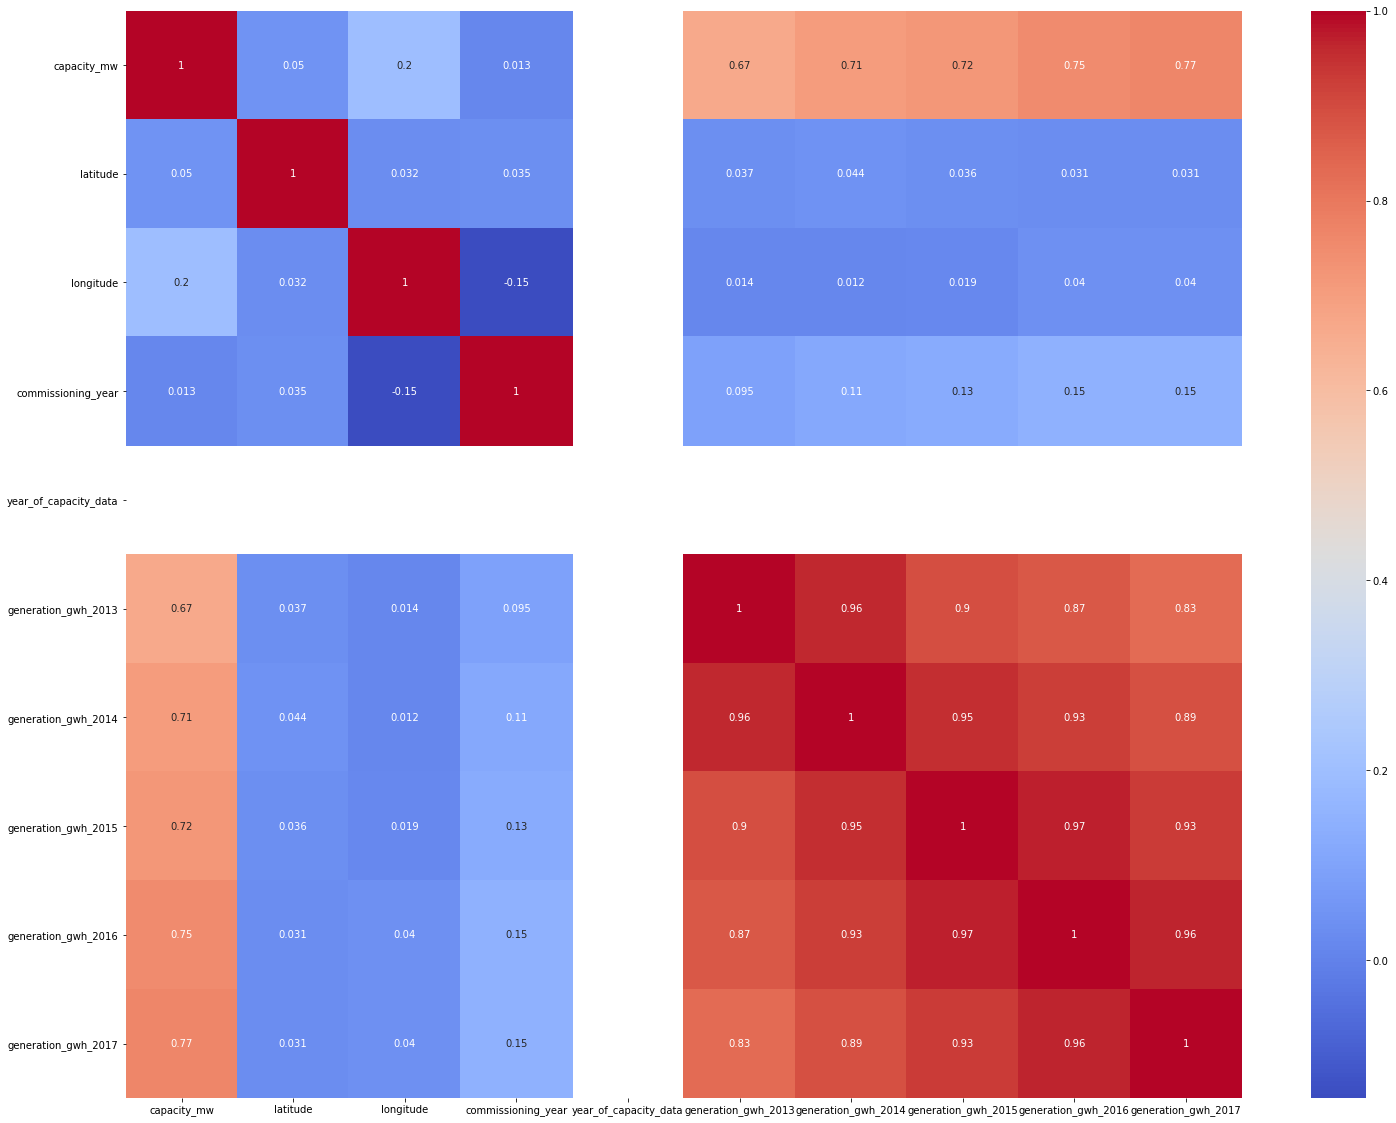

In [85]:
#Checking of correlation of features with each other
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)
plt.show()

In [86]:
# we see that generation_gwth_2013,2014,2015,2016,2017 highly positive correlation with capacity_mega_watt
#generation_gwth_2013,2014,2015,2016,2017  correlated with each other

In [87]:
#Filter categorical features
numerics=['int8','int16','int32','int64','float16','float32','float64']
categorical_columns=[]
features=data.columns.values.tolist()
for col in features:
    if data[col].dtype in numerics:
        continue
    categorical_columns.append(col)

In [88]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for columns in data.columns:
    data["country"]=le.fit_transform(data["country"])
    data["name"]=le.fit_transform(data["name"])
    data["primary_fuel"]=le.fit_transform(data["primary_fuel"])
    data["other_fuel1"]=le.fit_transform(data["other_fuel1"])
    data["owner"]=le.fit_transform(data["owner"])
    data["source"]=le.fit_transform(data["source"])
    data["geolocation_source"]=le.fit_transform(data["geolocation_source"])
    data["generation_data_source"]=le.fit_transform(data["generation_data_source"])

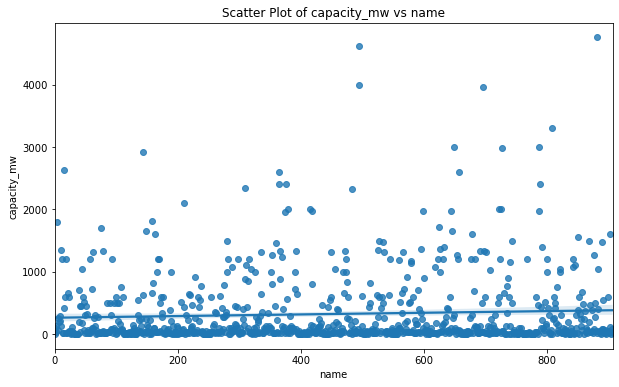

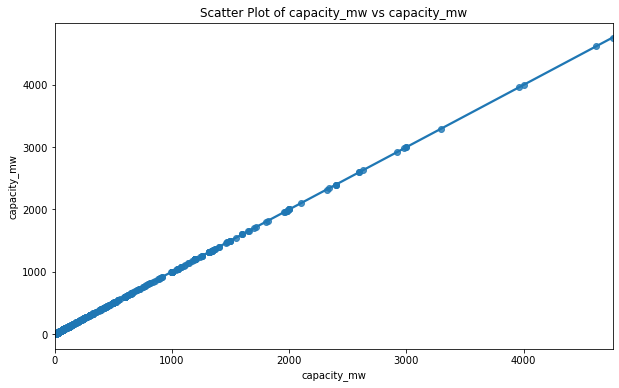

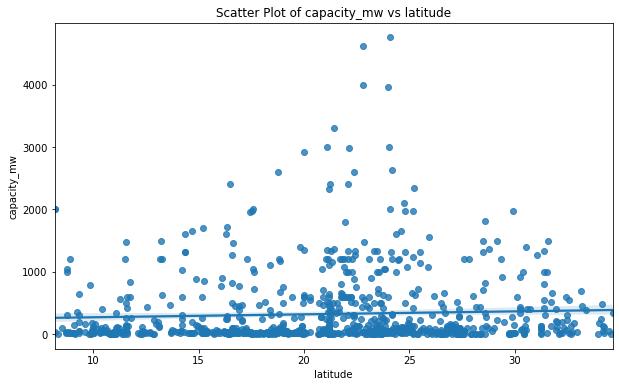

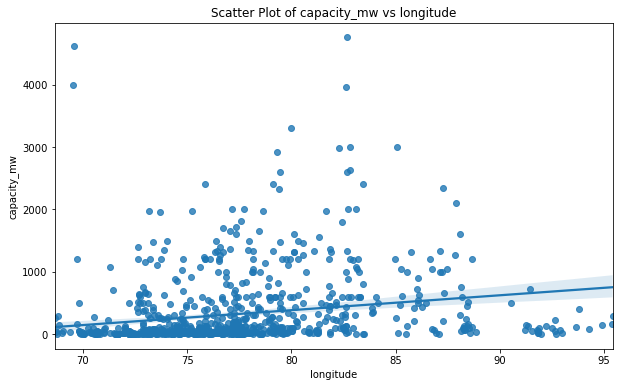

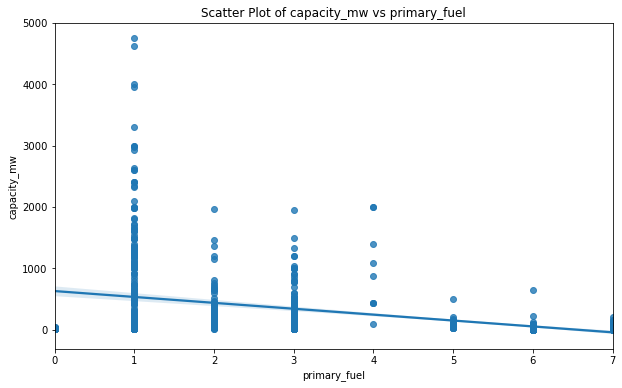

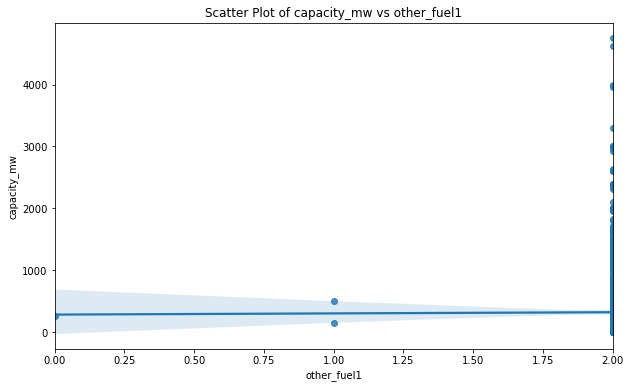

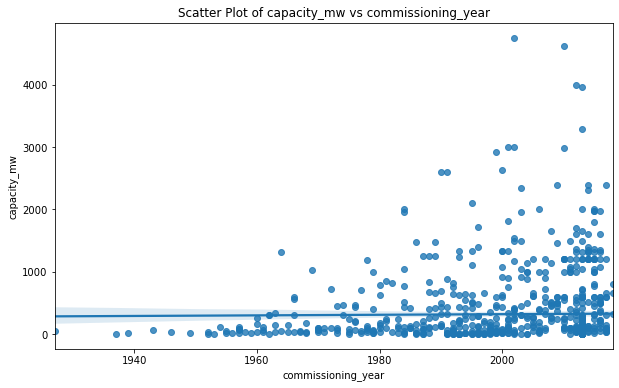

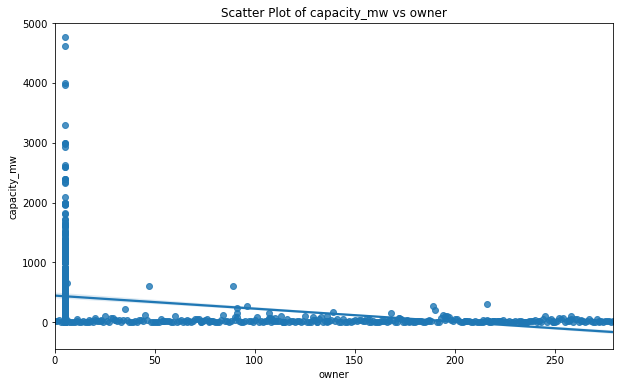

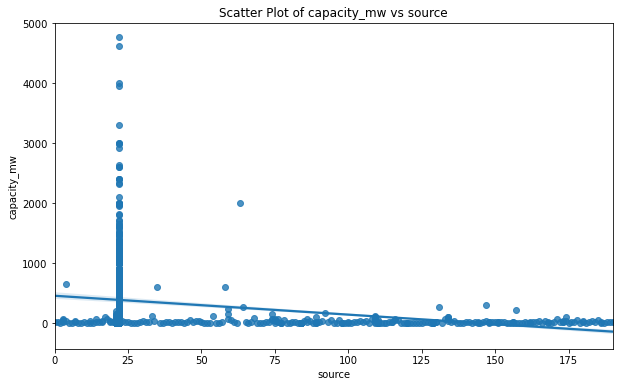

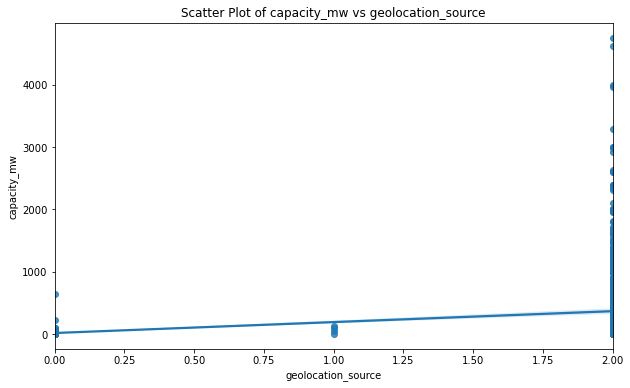

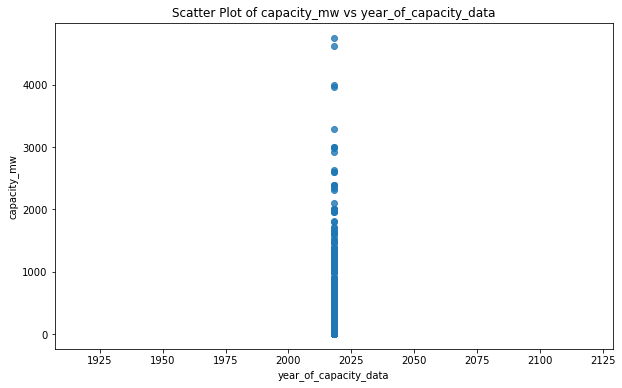

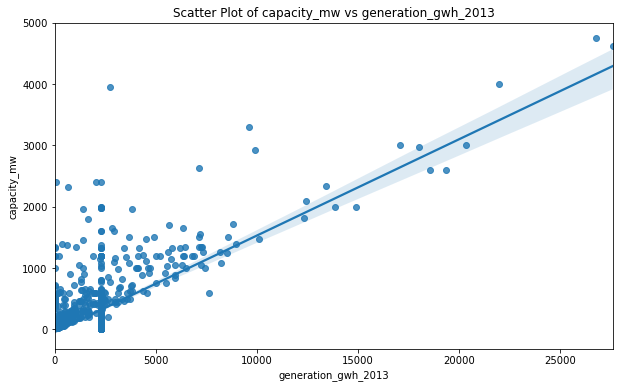

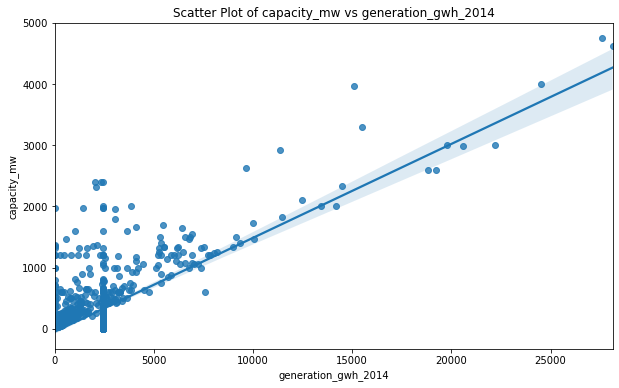

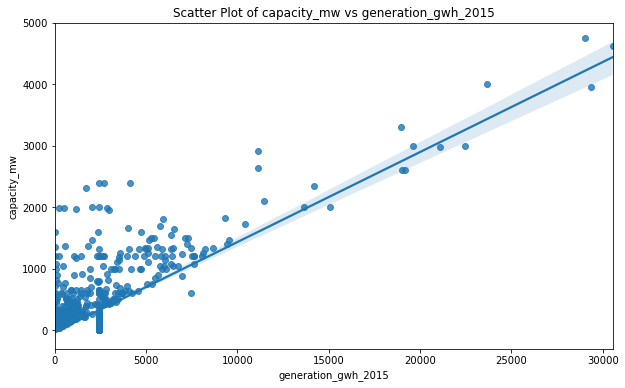

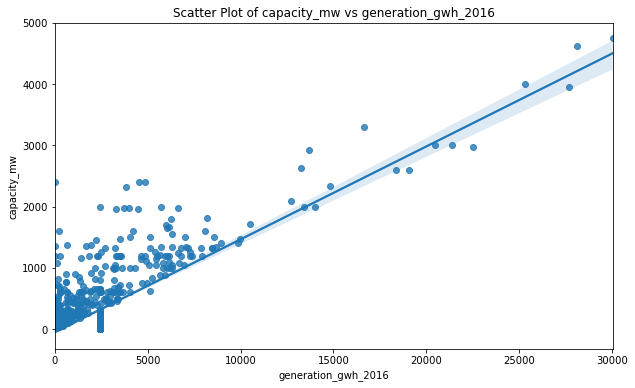

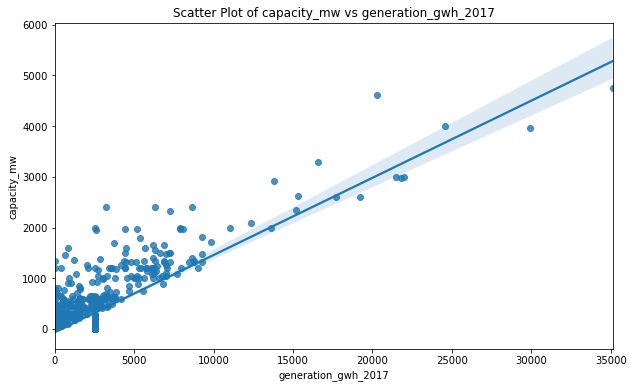

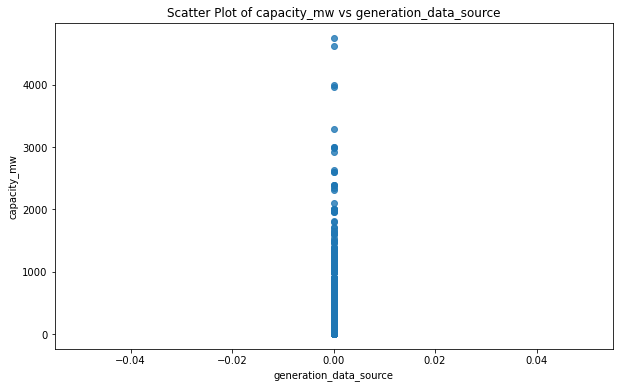

In [89]:
# Let's checking feature vs label relationship
collist=data.columns.values
for i in range(1,len(collist)):
    plt.figure(figsize = (10,6))
    sns.regplot(data[collist[i]], data['capacity_mw'])
    plt.title('Scatter Plot of capacity_mw vs %s' %(collist[i]))
    plt.xlabel(collist[i])
    plt.ylabel('capacity_mw')
    plt.show()

In [90]:
# we see that capacity_mw to genearation_gwh_2013,2014,2015,2016,2017 has strong positive with label
# name,latitude,longtitude & grolocation_source otherfuel etc has  null correlation with label
#  primary fuel ,owner and source has negative relationship

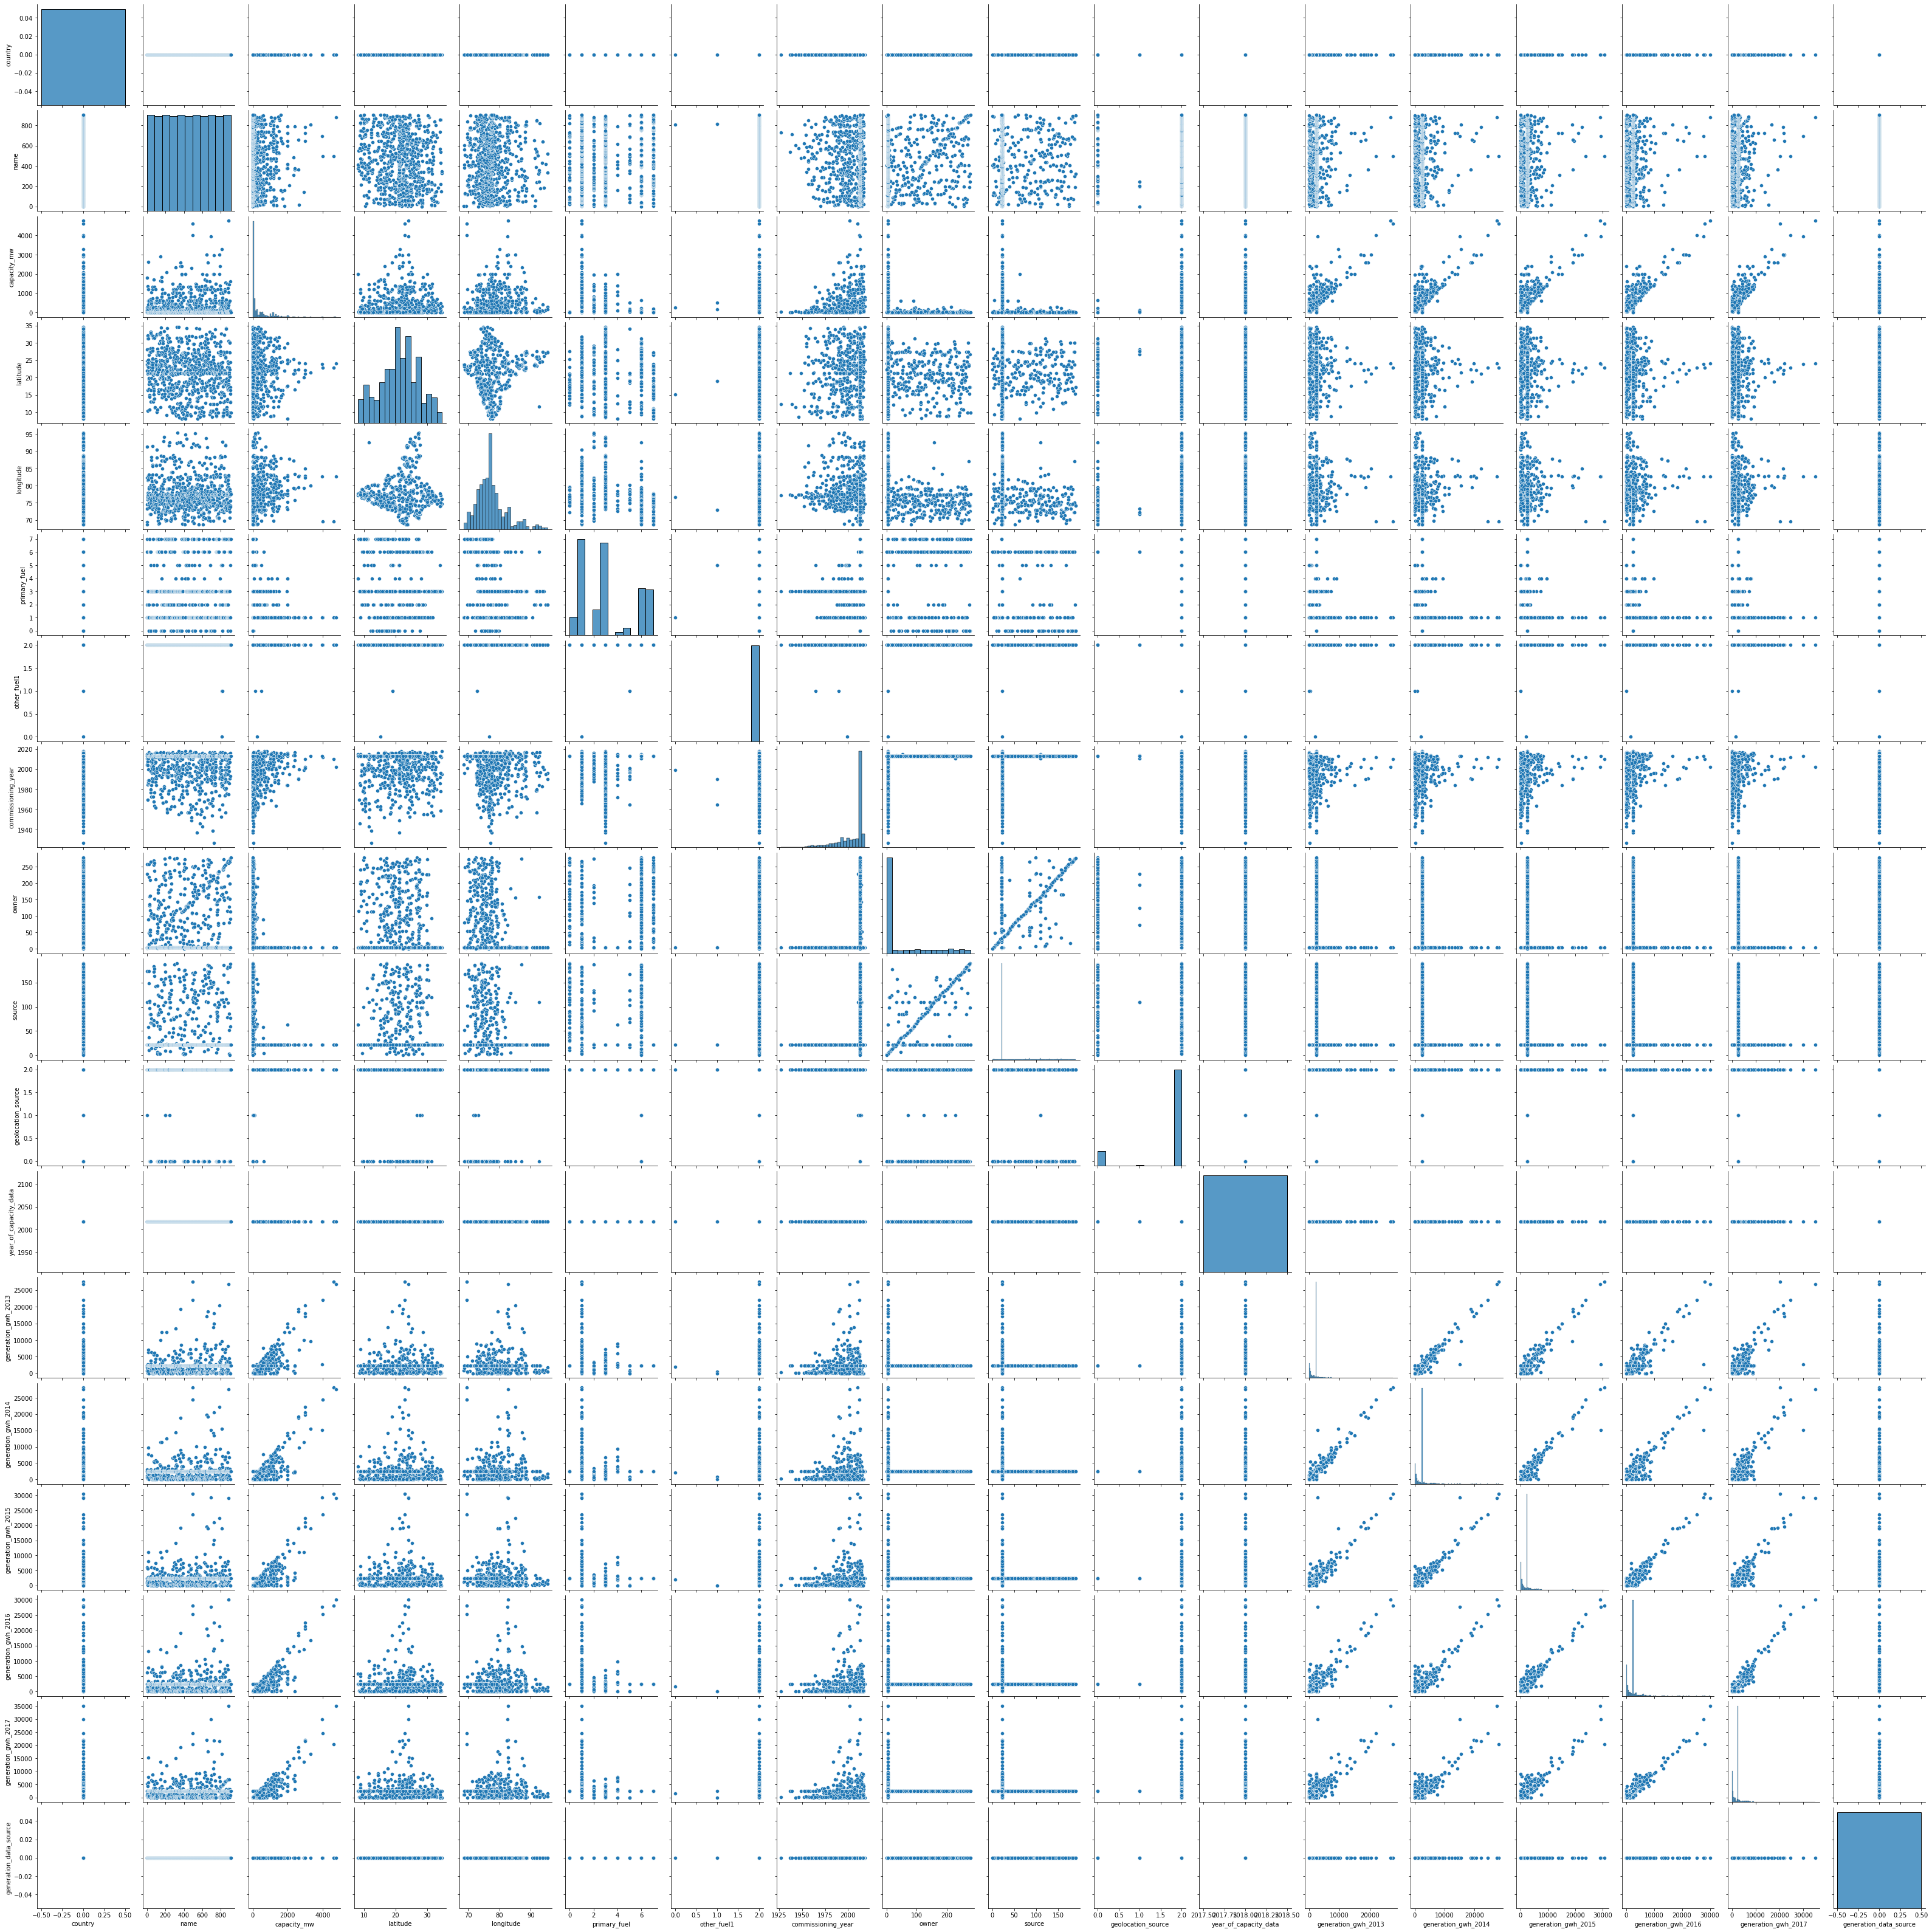

In [91]:
#Drawing Pairplot
sns.pairplot(data)
plt.show()

In [92]:
#In pairplot we cannot understand properly

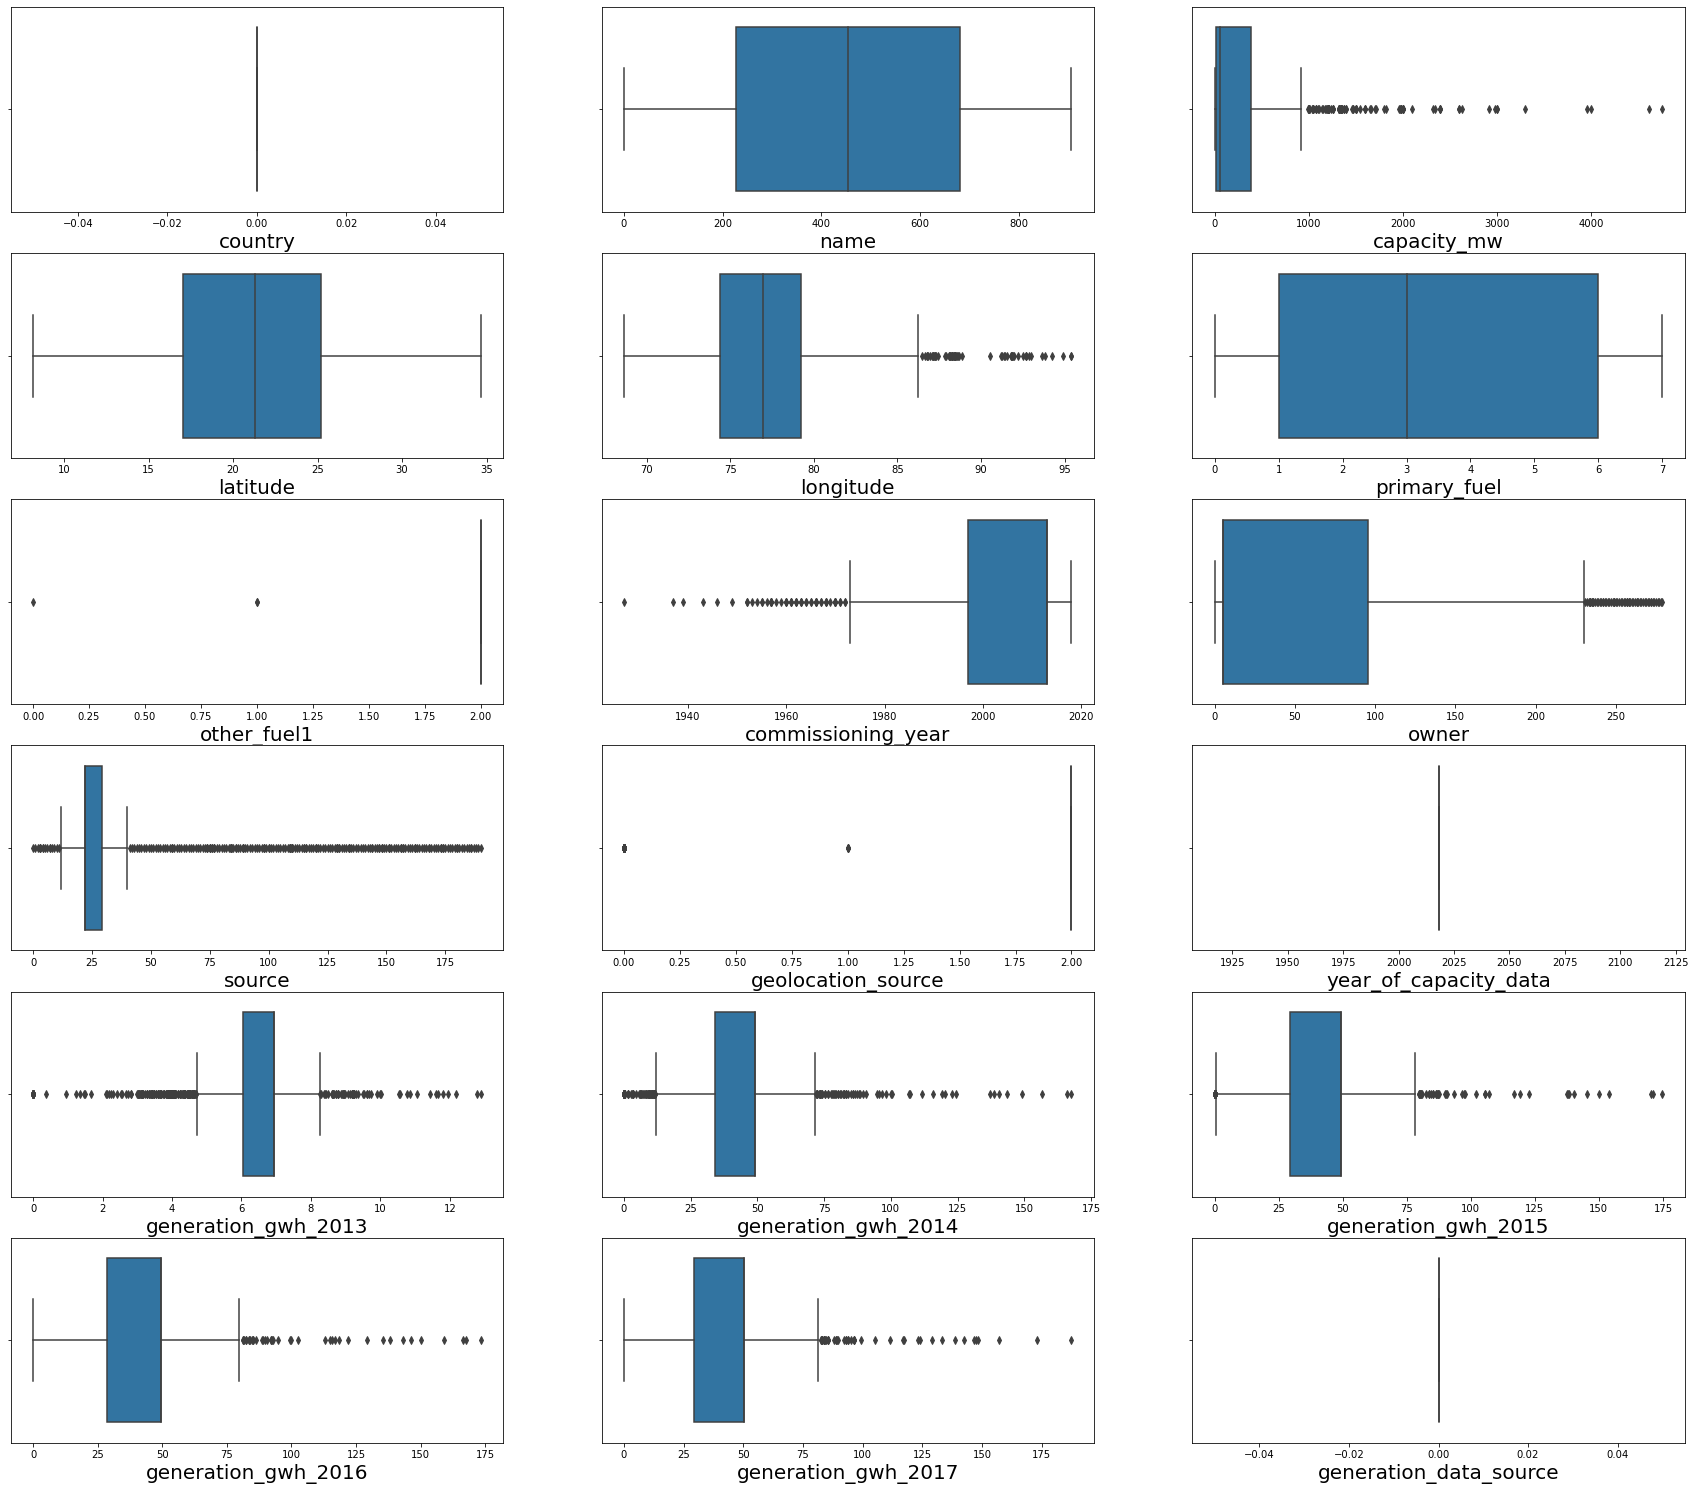

In [100]:
# let's see how data for every column
plt.figure(figsize=(30,40), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=18 :     # as there are 18 columns in the data
        ax = plt.subplot(9,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [94]:
#we see that outlier are present in dataset

In [95]:
data.skew() 

country                    0.000000
name                       0.000000
capacity_mw                3.193257
latitude                  -0.147391
longitude                  1.129836
primary_fuel               0.471141
other_fuel1              -20.464435
commissioning_year        -1.779021
owner                      1.366078
source                     1.829145
geolocation_source        -2.161710
year_of_capacity_data      0.000000
generation_gwh_2013        5.241491
generation_gwh_2014        5.041961
generation_gwh_2015        5.367370
generation_gwh_2016        5.071758
generation_gwh_2017        5.111938
generation_data_source     0.000000
dtype: float64

In [96]:
# we  accept the skewness between -.5 to +.5 and we ignore object dtype skweness

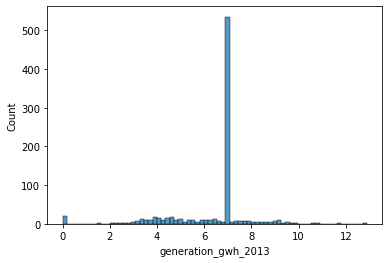

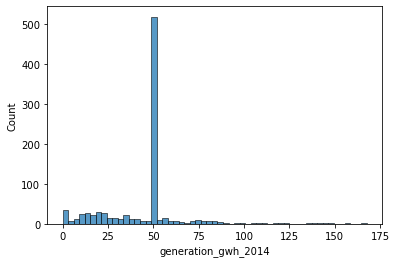

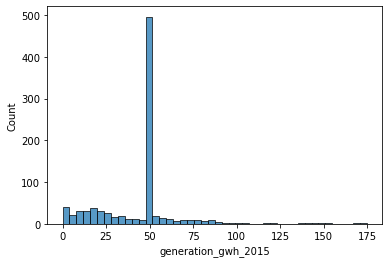

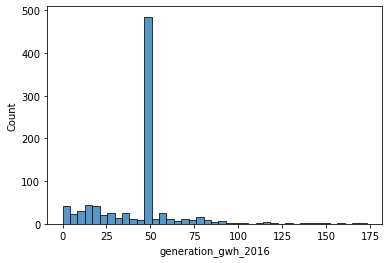

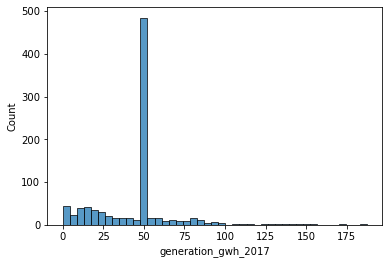

In [98]:
#Removing skewness
data['generation_gwh_2013'] =np.sqrt(data['generation_gwh_2013'])
sns.histplot(data['generation_gwh_2013'])
plt.show()
data['generation_gwh_2014'] =np.sqrt(data['generation_gwh_2014']) 
sns.histplot(data['generation_gwh_2014'])
plt.show()
data['generation_gwh_2015'] =np.sqrt(data['generation_gwh_2015'])
sns.histplot(data['generation_gwh_2015'])
plt.show()
data['generation_gwh_2016'] =np.sqrt(data['generation_gwh_2016'])
sns.histplot(data['generation_gwh_2016'])
plt.show()
data['generation_gwh_2017']=np.sqrt(data['generation_gwh_2017'])
sns.histplot(data['generation_gwh_2017'])
plt.show()

In [ ]:
country
name
primary_fuel
other_fuel1
owner
source
geolocation_source
generation_data_source

In [99]:
data.skew() 

country                    0.000000
name                       0.000000
capacity_mw                3.193257
latitude                  -0.147391
longitude                  1.129836
primary_fuel               0.471141
other_fuel1              -20.464435
commissioning_year        -1.779021
owner                      1.366078
source                     1.829145
geolocation_source        -2.161710
year_of_capacity_data      0.000000
generation_gwh_2013       -1.086081
generation_gwh_2014        0.988517
generation_gwh_2015        1.057697
generation_gwh_2016        0.982545
generation_gwh_2017        0.901027
generation_data_source     0.000000
dtype: float64

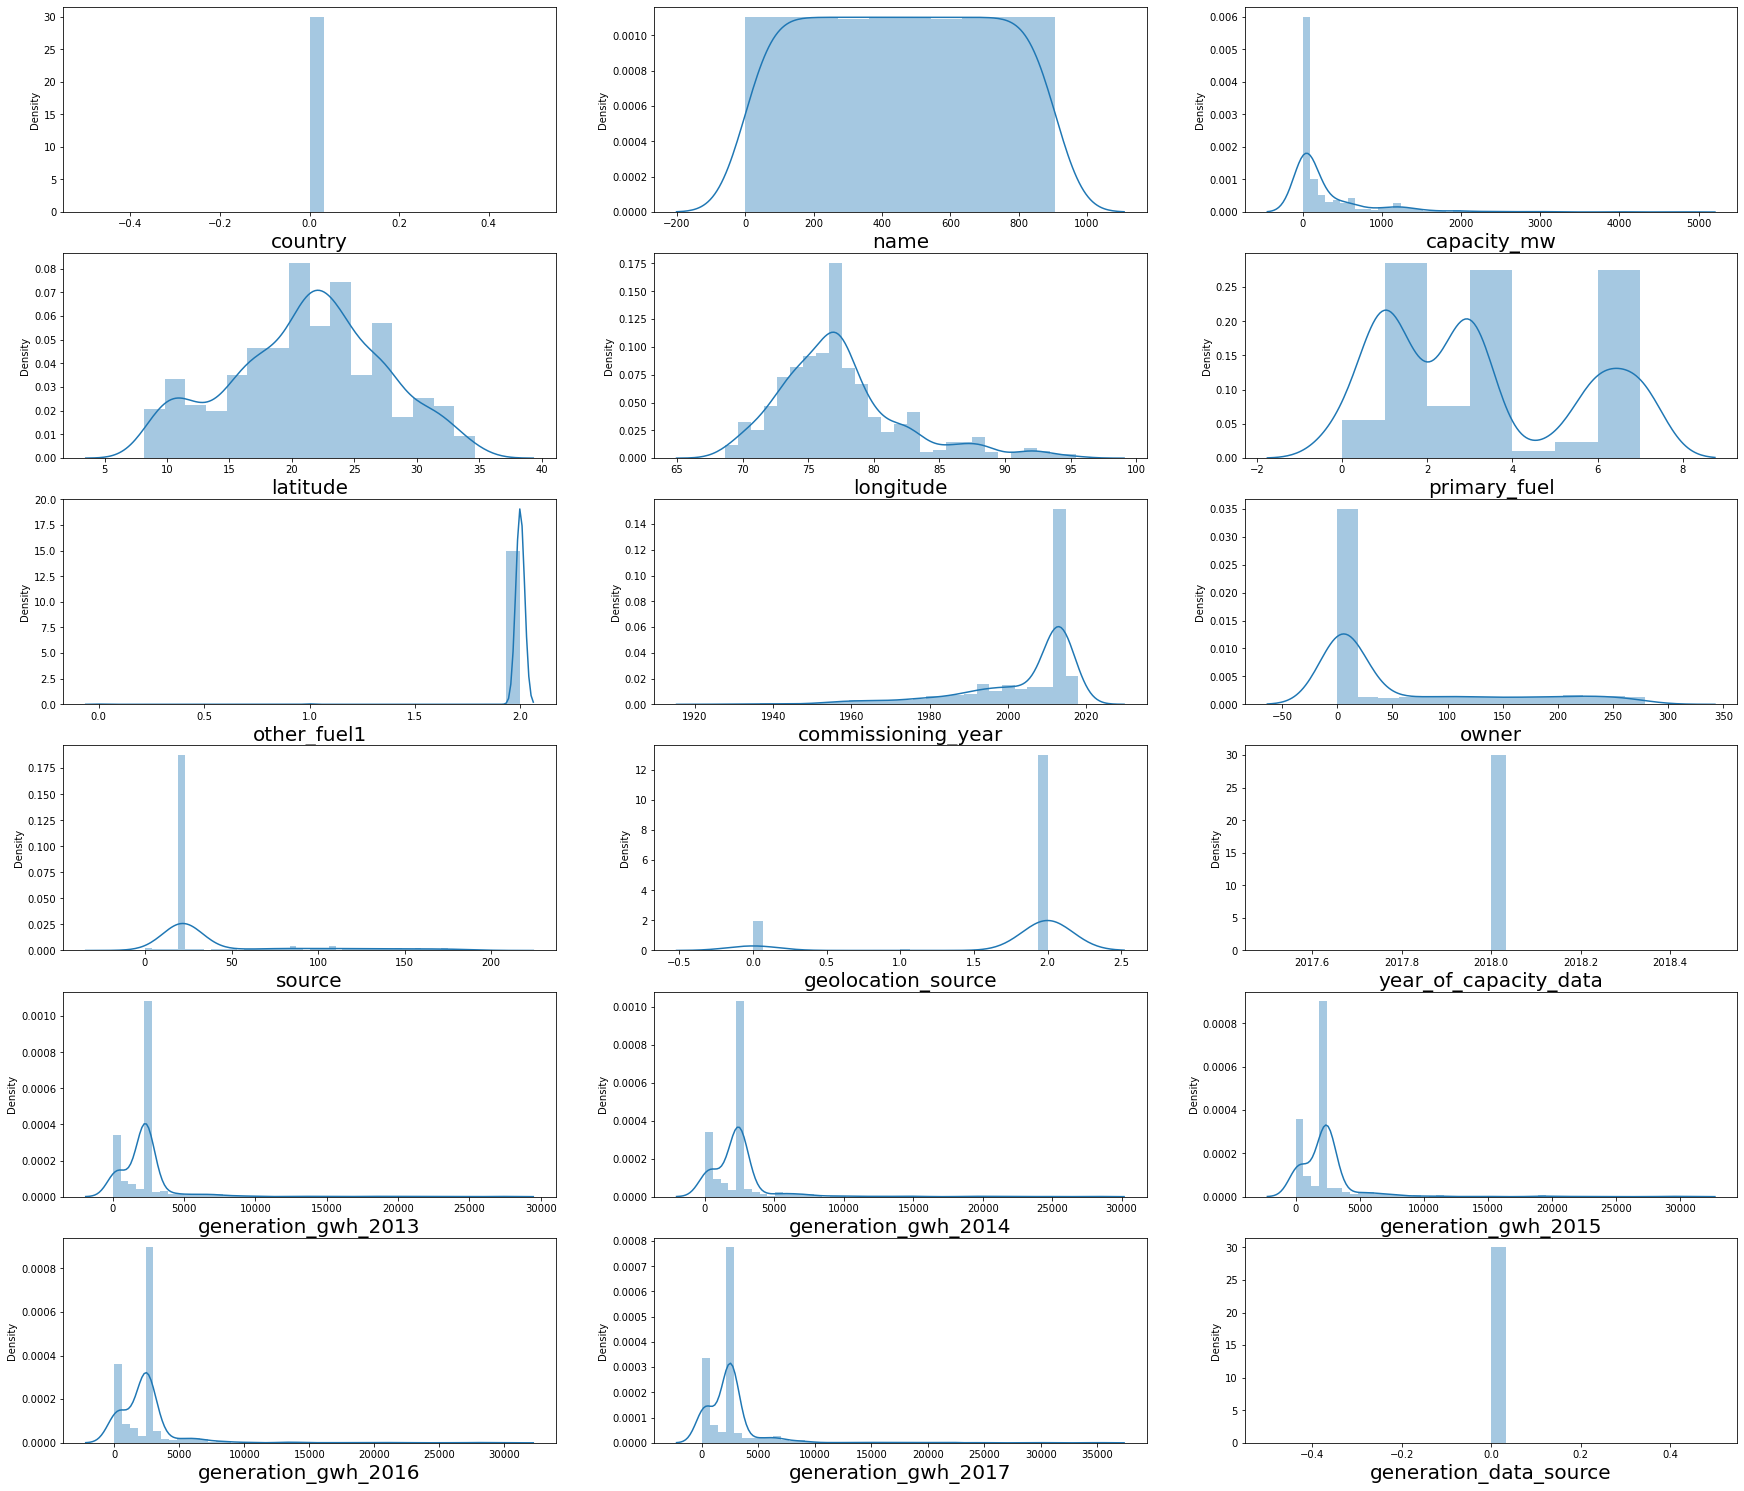

In [93]:
# let's see how data is distributed for every column
plt.figure(figsize=(30,40), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=18 :     # as there are 18 columns in the data
        ax = plt.subplot(9,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [ ]:
# Using SelectKBest Feature Selection Method
#SelectKBest Use f_Classif function to find best features, where f_classif uses ANOVA Test.

In [101]:
# Now we split feature and label
x=data.drop("capacity_mw",axis=1)
y=data["capacity_mw"]

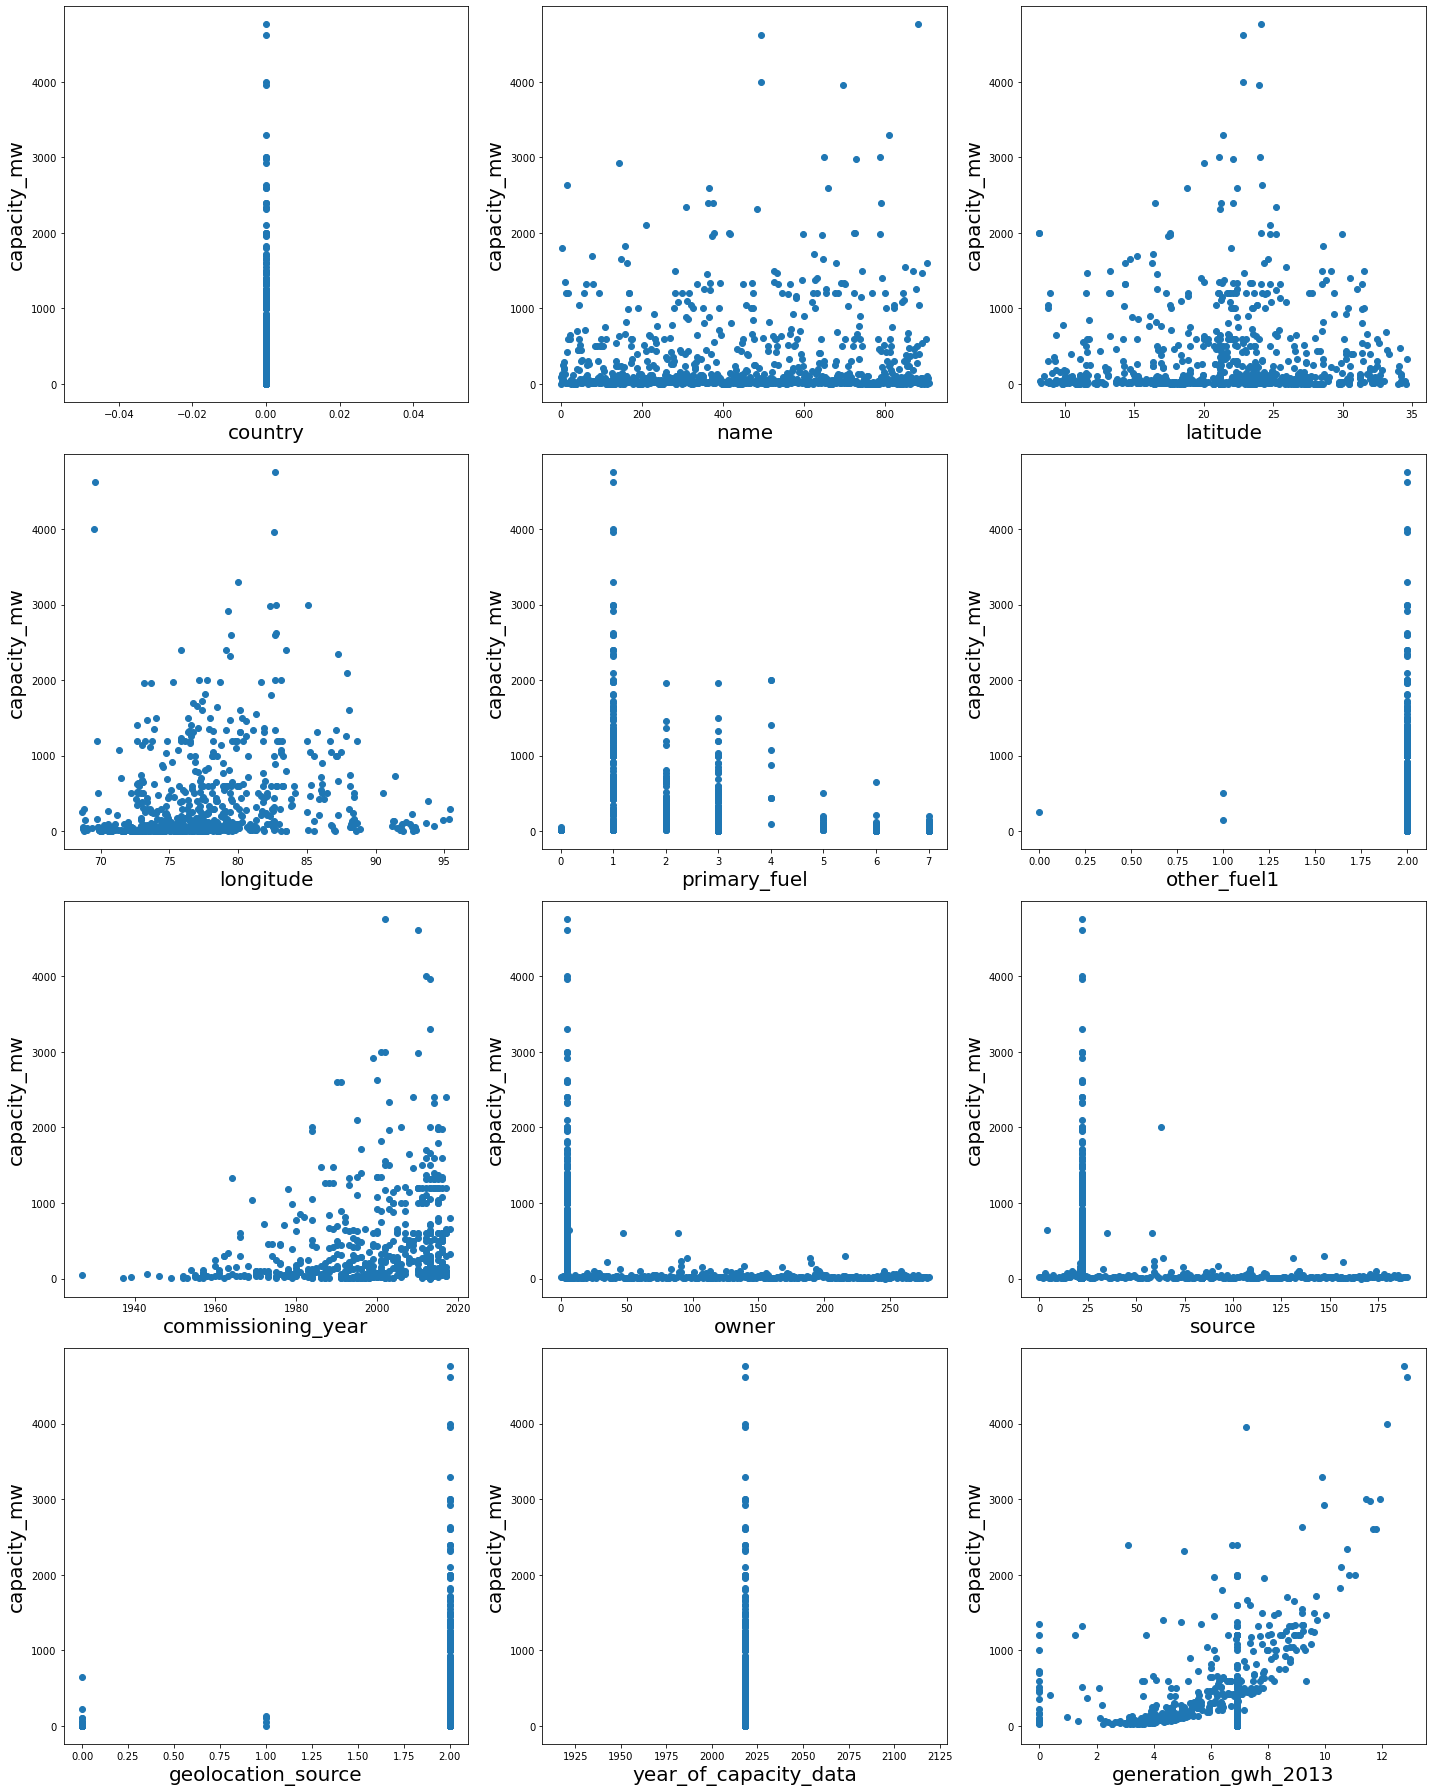

In [102]:
# Let' see relation between features and labels.
plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in x:
    if plotnumber <=12:
        ax = plt.subplot(4,3, plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('capacity_mw', fontsize = 20)
    plotnumber += 1
plt.tight_layout()

In [105]:
from sklearn.feature_selection import SelectKBest, f_classif

In [106]:
best_features = SelectKBest(score_func=f_classif, k=12)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score'] # name output columns
print(feature_scores.nlargest(12,'Score'))

           Feature_Name     Score
15  generation_gwh_2017  6.785030
14  generation_gwh_2016  5.909693
12  generation_gwh_2014  5.120086
13  generation_gwh_2015  5.061111
5           other_fuel1  3.573364
9    geolocation_source  3.122351
11  generation_gwh_2013  3.114920
4          primary_fuel  3.048859
6    commissioning_year  2.061374
7                 owner  1.954824
8                source  1.686962
3             longitude  1.516971


In [107]:
# Concatenate dataframe
feature_scores = pd.concat([df_columns,df_scores], axis = 1)

In [108]:
feature_scores.columns=['Features_Name','Score'] # Name of Output columns
feature_scores.columns

Index(['Features_Name', 'Score'], dtype='object')

In [109]:
print(feature_scores.nlargest(12,'Score')) # Print(12 best features)

          Features_Name     Score
15  generation_gwh_2017  6.785030
14  generation_gwh_2016  5.909693
12  generation_gwh_2014  5.120086
13  generation_gwh_2015  5.061111
5           other_fuel1  3.573364
9    geolocation_source  3.122351
11  generation_gwh_2013  3.114920
4          primary_fuel  3.048859
6    commissioning_year  2.061374
7                 owner  1.954824
8                source  1.686962
3             longitude  1.516971


In [110]:
x_new=data[['generation_gwh_2017','generation_gwh_2016','generation_gwh_2015','generation_gwh_2014','generation_gwh_2013','other_fuel1','geolocation_source','primary_fuel','commissioning_year','owner','source','longitude']]

In [111]:
from sklearn.preprocessing import StandardScaler
score =StandardScaler()
X_score = score.fit_transform(x_new)

In [112]:
# To find the best random state using Linear Regressor model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

maxAccu=0
maxRS=0

maxR2_Score=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    score = r2_score(y_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.7271735364367291  on Random_state  5


In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [114]:
# Finding Best Algorithm
#importing all the required libraries to find best Algorithm
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [115]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]

In [118]:
for m in model:
    print("*******************************************************************************")
    
    print('accuracy score of ->', m)
    
    m.fit(x_train,y_train)
    
    pred = m.predict(x_test)
    
    print("R2 Score:                ", r2_score(y_test,pred))
    
    print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred))
    
    print("Mean Squared error:      ", mean_squared_error(y_test,pred))
    
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred)))
    
    score=cross_val_score(m,x,y,cv=5)
    
    print(score)
    
    print("cross validation score:  ", abs(score.mean()))
    
    print("Difference between R2 score and cross validatio score is -> ",r2_score(y_test,pred)-abs(score.mean()))
    
    print("--------------------------------**********************--------------------------------------")

*******************************************************************************
accuracy score of -> LinearRegression()
R2 Score:                 0.7295360799398166
Mean Absolute Error:      246.6634192579664
Mean Squared error:       122851.06309836112
Root Mean Squared Error:  350.5011599101508
[0.51461403 0.38539044 0.58869805 0.62830585 0.69914979]
cross validation score:   0.5632316318975658
Difference between R2 score and cross validatio score is ->  0.16630444804225086
--------------------------------**********************--------------------------------------
*******************************************************************************
accuracy score of -> RandomForestRegressor()
R2 Score:                 0.896421869811842
Mean Absolute Error:      115.78331007326008
Mean Squared error:       47047.618789686145
Root Mean Squared Error:  216.90463063218854
[0.81845965 0.83312856 0.7967129  0.84152328 0.90195549]
cross validation score:   0.8383559754048184
Difference between R

In [119]:
#we see that RandomForestRegressor is best model and also give highest accuracy 89 and minimum difference

In [120]:
# Let's Use GridSearchCV for the best parameter to improve the accuracy

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
params={'bootstrap': [True],
        'max_depth': [80, 90, 100, 110],
        'min_samples_leaf': [3, 4, 5],
        'min_samples_split': [8, 10, 12],
        'n_estimators': [100, 200, 300, 1000]}

In [123]:
gridsearch = GridSearchCV(RandomForestRegressor(), param_grid=params,cv = 3, n_jobs = -1)

In [124]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]})

In [125]:
gridsearch.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [126]:
# we will use the best parameters in our gbr algorithm and check if accuracy is increasing.
rfr=gridsearch.best_estimator_

In [127]:
rfr.score(x_test,y_test)

0.8691174894967418

In [129]:
y_pred =rfr.predict(x_test)
accuracy = r2_score(y_test,y_pred)
print(accuracy)

0.8691174894967418


In [130]:
#hyperparameter tuning give 87 % accuracy

In [132]:
#Saving the model
import joblib 
joblib.dump(rfr,"global_power_plant_capacity_mw.pkl")

['global_power_plant_capacity_mw.pkl']